## Discover Worst-Case Scenario

In [8]:
# import packages
from ema_workbench import ema_logging, load_results, Scenario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = '800 cases 06032022.tar.gz' 
experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\pmg00\Documents\EPA Master program\EPA Master Thesis\Vensim Models\EMA Workbench connection\FinalUploadsToGithub\800 cases 06032022.tar.gz


In [9]:
#explore experiments
experiments

,Average time to approve and develop PPE,Average time to approve and develop products,Base capacity innovation,Base production capacity direct tender ventilator,Base raw material N95 respirators capacity direct tender,Base raw material N95 respirators capacity innovation PPE,Base raw material eye protection capacity direct tender,Base raw material eye protection capacity innovation PPE,Base raw material gloves capacity direct tender,Base raw material gloves capacity innovation PPE,...,Transportation time direct tender ventilator,Transportation time domestic production,Transportation time domestic production PPE,Transportation time ventilator innovation,change in transportation time,change in transportation time PPE,scenario,policy,model,model_file
0,88.585761,55.266664,25.887177,374.479989,62035.808501,15683.421912,46081.768175,15061.262502,4.395919e+07,53773.020441,...,9.043421,3.385736,12.660212,4.083092,37.013137,12.869704,0,All out,Model,Models\Infection Model Testing 02032022 AllOut...
1,42.081626,114.682821,24.625732,266.824896,57718.651271,13007.434302,339709.683652,20973.215428,1.648324e+07,67097.243285,...,1.755320,5.402158,7.137617,8.110051,46.804566,42.422142,1,All out,Model,Models\Infection Model Testing 02032022 AllOut...
2,52.025458,32.473991,21.544727,384.393299,29826.775065,18129.596237,396397.553940,21777.038573,4.645685e+07,84599.089073,...,9.915871,6.024025,7.814843,8.035673,12.376740,24.651407,2,All out,Model,Models\Infection Model Testing 02032022 AllOut...
3,92.631597,70.434724,8.562675,122.141965,56222.057963,3438.687403,143503.200831,5225.435766,6.637900e+06,128841.663510,...,5.196395,8.410689,9.802749,2.123683,12.605232,45.116553,3,All out,Model,Models\Infection Model Testing 02032022 AllOut...
4,78.507221,99.621957,1.916540,342.556772,30037.719977,12740.972428,292142.102110,674.411539,3.353730e+06,37384.735929,...,5.312804,2.117286,2.096329,5.690272,27.302325,30.463604,4,All out,Model,Models\Infection Model Testing 02032022 AllOut...
5,15.694695,102.482331,2.920020,192.100894,92075.646300,15394.752977,231326.363493,8739.864066,3.938874e+07,16730.852507,...,1.560435,1.950725,7.158335,4.023525,17.364575,46.983302,5,All out,Model,Models\Infection Model Testing 02032022 AllOut...
6,110.774191,71.333826,1.678623,293.607622,13808.580148,3892.179247,40041.185209,7861.404594,3.808182e+07,92329.927165,...,6.837502,6.852608,9.641680,2.416668,10.065598,28.185456,6,All out,Model,Models\Infection Model Testing 02032022 AllOut...
7,100.814950,54.595956,14.046620,396.872346,63149.812621,15296.746696,179046.856630,22100.435085,2.093369e+07,65704.226529,...,9.505287,1.892245,12.025657,3.493248,9.828827,19.491582,7,All out,Model,Models\Infection Model Testing 02032022 AllOut...
8,82.180420,30.020639,21.996344,465.773604,23866.799578,16186.301055,50221.740850,4128.551292,2.446237e+07,152845.891384,...,4.145298,2.638832,10.979293,2.850400,16.039210,37.905362,8,All out,Model,Models\Infection Model Testing 02032022 AllOut...
9,114.610213,52.650657,12.397299,98.585897,83688.585142,7947.236246,163326.932270,7533.479079,2.727494e+07,66415.494539,...,2.769610,7.422374,3.919901,1.651478,55.944375,18.464699,9,All out,Model,Models\Infection Model Testing 02032022 AllOut...


In [10]:
#explore outcomes
outcomes

{'TIME': array([[  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ],
        [  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ],
        [  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ],
        ...,
        [  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ],
        [  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ],
        [  0. ,   0.5,   1. , ..., 209. , 209.5, 210. ]]),
 'Shortage of eye protection per day in UK considering threshold': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'Shortage of simple masks per day in UK considering threshold': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'Short

In [11]:
# create new dictionary with outcomes of interest for determining worst case
outcomes_reduced = outcomes

In [12]:
policies = experiments['policy']

In [13]:
#only include scalar outcomes 
keys_to_remove = ["TIME",
    "Shortage of eye protection per day in UK considering threshold",
                  "Shortage of simple masks per day in UK considering threshold",
                    "Shortage of N95 respirators per day in UK considering threshold",
"Shortage of gowns per day in UK considering threshold",
"Shortage of gloves per day in UK considering threshold",
"Shortage of ventilators per day",               
"Normalized shortage of ventilators",
"Normalized coverage ventilators",
"Eye protection supply ready to be shipped in UK",
"Simple masks supply ready to be shipped in UK",
"N95 respirators supply ready to be shipped in UK",
"Gowns supply ready to be shipped in UK",
"Gloves supply ready to be shipped in UK",
"Ventilators supply ready to be shipped",
"Coverage of eye protection for HCWs considering threshold",
"Coverage of simple masks for HCWs considering threshold",
"Coverage of N95 respirators for HCWs considering threshold",
"Coverage of gowns for HCWs considering threshold",
"Coverage of gloves for HCWs considering threshold",
"Total normalized shortage ventilator",
# "Total normalized coverage gloves",
"Total deahs due to Covid in UK",
# "Total normalized coverage eye protection", 
# "Total normalized coverage simple masks",
# "Total normalized coverage N95 respirators",
"Total cost for ventilators",
"Total cost for PPE"]

for key in keys_to_remove:
      outcomes_reduced.pop(key, None)

In [14]:
#create new dictionary with last values of each experiment
last_values = {k: v[:, -1] for k, v in outcomes_reduced.items()}

In [17]:
data = pd.DataFrame.from_dict(last_values)
data['policy'] =policies


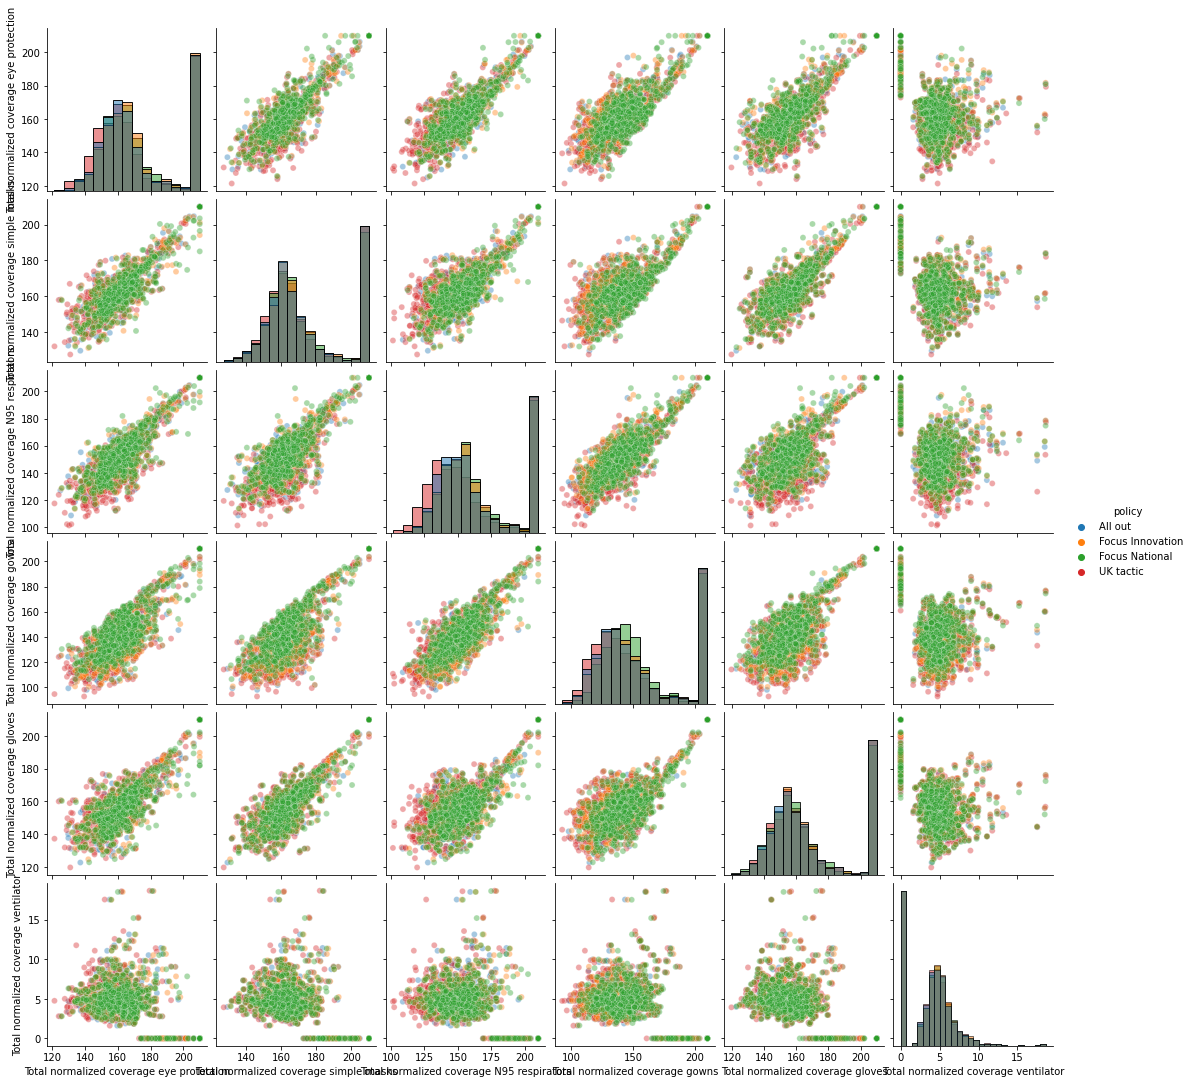

In [20]:
#plotting pairplot 
sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist', plot_kws={'alpha':0.4} )
# plt.savefig('figures/pairplot_totalshortages.png')
plt.show()

# defining reference scenario

In [21]:
# choosing total gowns as there was longest shortage 

index_worst_case = data['Total normalized coverage gowns'].idxmax()
index_worst_case

1

In [22]:
index_worst_case_vent = data['Total normalized coverage ventilator'].idxmin()
index_worst_case_vent

1

In [23]:
index_worst_case_gloves = data['Total normalized coverage gloves'].idxmin()
index_worst_case_gloves

1316

In [24]:
index_worst_case_N95 = data['Total normalized coverage N95 respirators'].idxmin()
index_worst_case_N95

1249

In [25]:
index_worst_case_mask = data['Total normalized coverage simple masks'].idxmin()
index_worst_case_mask

1316

In [26]:
index_worst_case_eye = data['Total normalized coverage eye protection'].idxmin()
index_worst_case_eye

947

In [27]:
index_worst_gowns = data['Total normalized coverage gowns'].idxmin()
index_worst_gowns

1072

In [28]:
## worst case masks and gloves
worst_case = experiments.iloc[index_worst_case_mask]
worst_case=worst_case.to_dict()

split_idx = -4
worst_case = dict(list(worst_case.items())[:split_idx])

In [29]:
worst_case

{'Average time to approve and develop PPE': 79.17634288425248,
 'Average time to approve and develop products': 37.97153705605813,
 'Base capacity innovation': 13.356749708557222,
 'Base production capacity direct tender ventilator': 394.3537396080108,
 'Base raw material N95 respirators capacity direct tender': 33629.066422013246,
 'Base raw material N95 respirators capacity innovation PPE': 16344.493630854366,
 'Base raw material eye protection capacity direct tender': 139406.76631043447,
 'Base raw material eye protection capacity innovation PPE': 28182.108290345517,
 'Base raw material gloves capacity direct tender': 826104.1995889662,
 'Base raw material gloves capacity innovation PPE': 153372.35029531104,
 'Base raw material gowns capacity direct tender': 237972.05078569372,
 'Base raw material gowns capacity innovation PPE': 4090.0864981166606,
 'Base raw material procurement N95 respirators domestic production': 48155.0508022354,
 'Base raw material procurement N95 respirators 

In [30]:
max_outcomes = data.max()
max_outcomes

Total normalized coverage eye protection       209.969
Total normalized coverage simple masks         209.969
Total normalized coverage N95 respirators      209.969
Total normalized coverage gowns                209.969
Total normalized coverage gloves               209.969
Total normalized coverage ventilator           18.6534
policy                                       UK tactic
dtype: object

In [31]:
min_outcomes = data.min()
min_outcomes

Total normalized coverage eye protection     121.413
Total normalized coverage simple masks       127.367
Total normalized coverage N95 respirators    101.458
Total normalized coverage gowns              92.8788
Total normalized coverage gloves             119.651
Total normalized coverage ventilator               0
policy                                       All out
dtype: object

In [32]:
### worst case scenario ventilators
worst_case_vent = experiments.iloc[index_worst_case_vent]
worst_case_vent=worst_case_vent.to_dict()

split_idx = -4
worst_case_vent = dict(list(worst_case.items())[:split_idx])
worst_case_vent

{'Average time to approve and develop PPE': 79.17634288425248,
 'Average time to approve and develop products': 37.97153705605813,
 'Base capacity innovation': 13.356749708557222,
 'Base production capacity direct tender ventilator': 394.3537396080108,
 'Base raw material N95 respirators capacity direct tender': 33629.066422013246,
 'Base raw material N95 respirators capacity innovation PPE': 16344.493630854366,
 'Base raw material eye protection capacity direct tender': 139406.76631043447,
 'Base raw material eye protection capacity innovation PPE': 28182.108290345517,
 'Base raw material gloves capacity direct tender': 826104.1995889662,
 'Base raw material gloves capacity innovation PPE': 153372.35029531104,
 'Base raw material gowns capacity direct tender': 237972.05078569372,
 'Base raw material gowns capacity innovation PPE': 4090.0864981166606,
 'Base raw material procurement N95 respirators domestic production': 48155.0508022354,
 'Base raw material procurement N95 respirators 